# Sobel (edge detection) mask from scratch: single process

Using no parallelization.

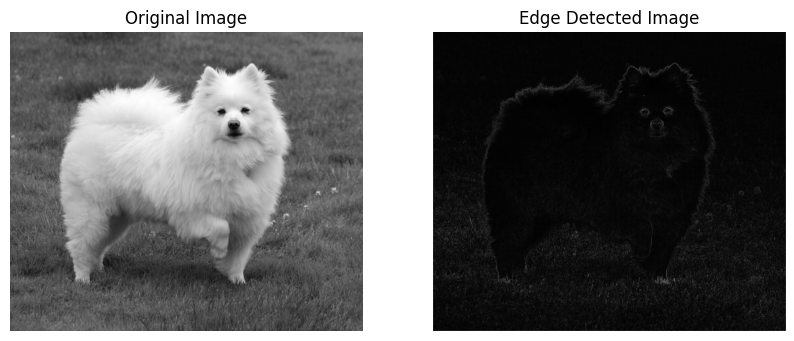

CPU times: user 1min 40s, sys: 1.76 s, total: 1min 42s
Wall time: 1min 43s


In [ ]:
%%time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_image(image_path):
    """
    Load an image and convert it to grayscale.
    """
    image = Image.open(image_path).convert('L')
    return np.array(image)

def apply_convolution(image, kernel):
    """
    Apply a convolution operation on the image with a given kernel.
    """
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    # Padding to keep the output size the same as the input size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Initialize the output image
    output = np.zeros_like(image, dtype=float)

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)

    return output

def normalize_image(image):
    """
    Normalize an image to the range 0-255.
    """
    image = np.abs(image)
    return ((image - np.min(image)) / (np.max(image) - np.min(image)) * 255).astype(np.uint8)

def detect_edges(image):
    """
    Detect edges using the Sobel operator.
    """
    # Sobel kernels for detecting horizontal and vertical edges
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])

    # Apply convolution with Sobel kernels
    gradient_x = apply_convolution(image, sobel_x)
    gradient_y = apply_convolution(image, sobel_y)

    # Combine gradients to compute the edge intensity
    edges = np.sqrt(gradient_x**2 + gradient_y**2)

    return normalize_image(edges)

# image_path = 'https://en.wikipedia.org/wiki/File:American_Eskimo_Dog_1.jpg'  # Replace with your image path
image_path = './American_Eskimo_Dog_1.jpg'
image = load_image(image_path)

edges = detect_edges(image)

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edge Detected Image')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()